* Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs better
* Explain why that might be happening. Are the localized translations really worse?
* If you identified what was wrong, design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.


# Import Libraries and data

In [1]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
test_table = pd.read_csv("/Users/ziweili/Desktop/Collections_of_DS_FULL/Datasets/Translation_Test/test_table.csv")
user_table = pd.read_csv("/Users/ziweili/Desktop/Collections_of_DS_FULL/Datasets/Translation_Test/user_table.csv")

In [5]:
test_table.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [21]:
test_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [22]:
test_table.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [9]:
user_table.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [23]:
user_table.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [24]:
user_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
user_id    452867 non-null int64
sex        452867 non-null object
age        452867 non-null int64
country    452867 non-null object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [26]:
## Check if the number of unique users are the same.
print(test_table.user_id.nunique())
print(len(test_table))
print(test_table.user_id.nunique() == len(test_table))

453321
453321
True


In [27]:
print(user_table.user_id.nunique())
print(len(user_table))
print(user_table.user_id.nunique() == len(user_table))

452867
452867
True


This means each user we choose for this test is unique. There are no duplicates.

In [20]:
## Merge dataset
df = test_table.merge(user_table, on='user_id')

# EDA

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452867 entries, 0 to 452866
Data columns (total 12 columns):
user_id             452867 non-null int64
date                452867 non-null object
source              452867 non-null object
device              452867 non-null object
browser_language    452867 non-null object
ads_channel         181693 non-null object
browser             452867 non-null object
conversion          452867 non-null int64
test                452867 non-null int64
sex                 452867 non-null object
age                 452867 non-null int64
country             452867 non-null object
dtypes: int64(4), object(8)
memory usage: 44.9+ MB


Group dataset by 'country' to see if Spain is doing better than other countryies when using the old version

In [40]:
gp1 = df[df['test'] == 0][['conversion','country']].groupby(['country']).mean()
gp1 = gp1.reset_index()
gp1 = gp1.sort_values(by = ['conversion'], ascending=False)

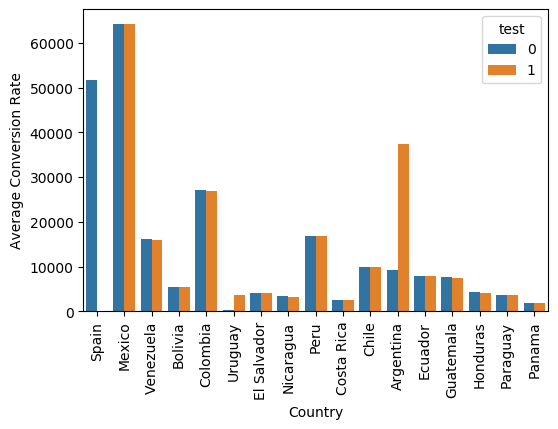

In [166]:
plt.figure(dpi = (100))
_ = sns.countplot(x = 'country', hue = 'test', data = df)
_ = _.set_xticklabels(_.get_xticklabels(), rotation = 90)
_ = plt.xlabel("Country")
_ = plt.ylabel("Average Conversion Rate")

From the plot we can see that, in Uruguay and Argentina, there might be some discrepency in the number of user in each group. This might make the experiment to be invlidated because the bias cause from sampling.

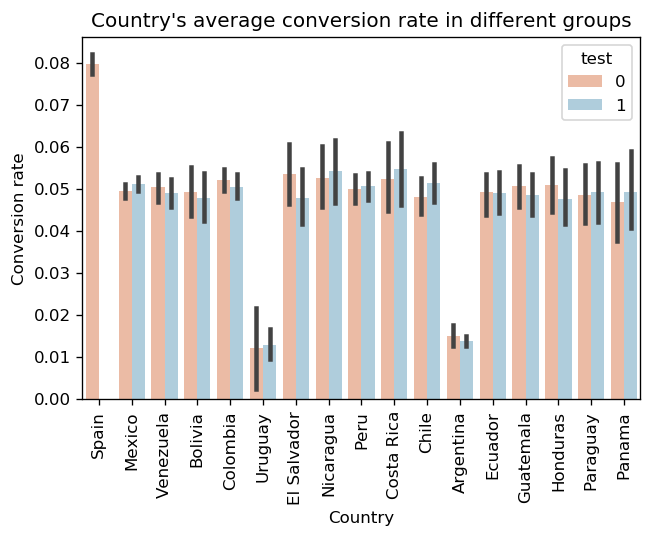

In [59]:
plt.figure(dpi = (120))
_ = sns.barplot(x = 'country', y = 'conversion', hue='test',data=df,palette="RdBu")
_ = _.set_xticklabels(_.get_xticklabels(), rotation = 90)
_ = plt.xlabel("Country")
_ = plt.ylabel("Conversion rate")
_ = plt.title("Country's average conversion rate in different groups")

We can see that, for some countries like Mexico, Peru, Ecuador, the test's performance is better than control's. But for Venezuela, Bolivia, and some other countries, the old version still did better than the new. Therefore, we need further analysis to decide whether the new version is better or not.


In [61]:
data = df[df['country'] != 'Spain']

In [69]:
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21,Mexico
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35,Mexico


## For date

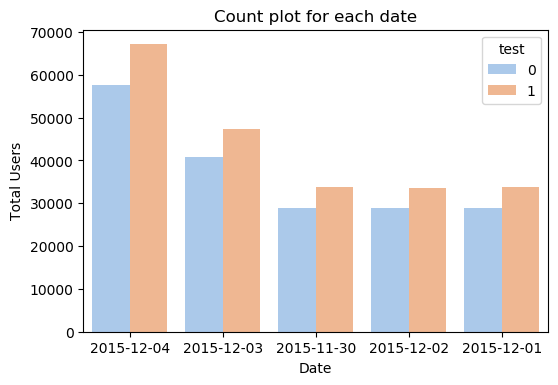

In [98]:
plt.figure(dpi = (100))
_ = sns.countplot(x = 'date', hue = 'test', data = data, palette='pastel')
_ = plt.xlabel("Date")
_ = plt.ylabel("Total Users")
_ = plt.title("Count plot for each date")

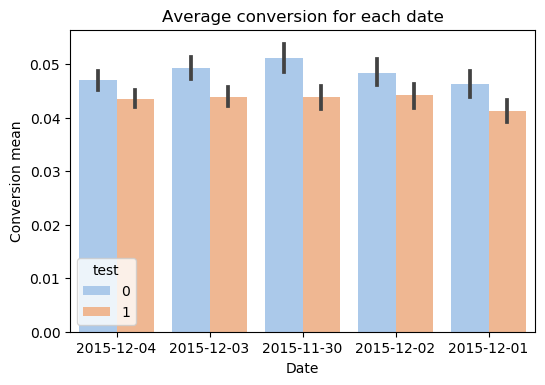

In [99]:
plt.figure(dpi = (100))
_ = sns.barplot(x = 'date', y = 'conversion', data = data, palette='pastel', hue = 'test')
_ = plt.xlabel("Date")
_ = plt.ylabel("Conversion mean")
_ = plt.title("Average conversion for each date")

From above plots, we can see that the number of users shows a decreasing trend. And the for each date's conversion rate is relative lower in treatment group compared to control group.

## For source

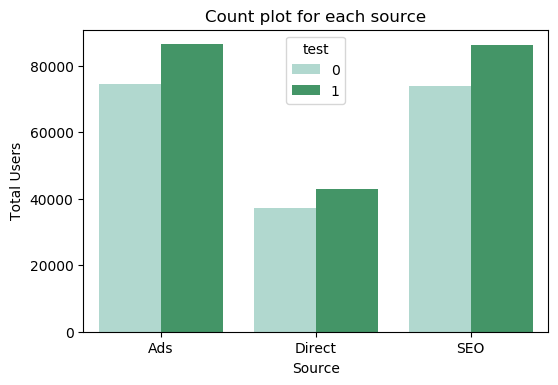

In [101]:
plt.figure(dpi = (100))
_ = sns.countplot(x = 'source', hue = 'test', data = data, palette='BuGn')
_ = plt.xlabel("Source")
_ = plt.ylabel("Total Users")
_ = plt.title("Count plot for each source")

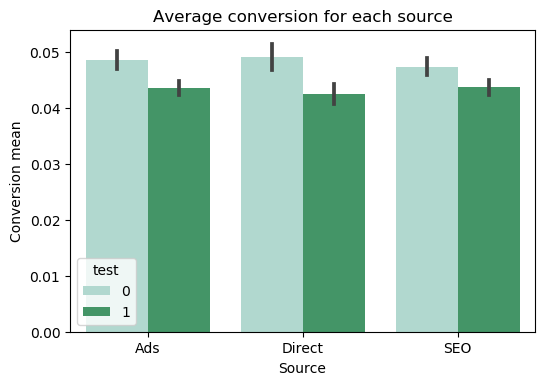

In [103]:
plt.figure(dpi = (100))
_ = sns.barplot(x = 'source', y = 'conversion', data = data, palette='BuGn', hue = 'test')
_ = plt.xlabel("Source")
_ = plt.ylabel("Conversion mean")
_ = plt.title("Average conversion for each source")

From the plots, we can see that users from 'Ads' and 'Seo' are almost equal, and also the highest. But least users are from 'Direct Source'.
But as for the average conversion, all sources have almost the same conversion rate, and the testing group's conversion is less than control's.

## For device

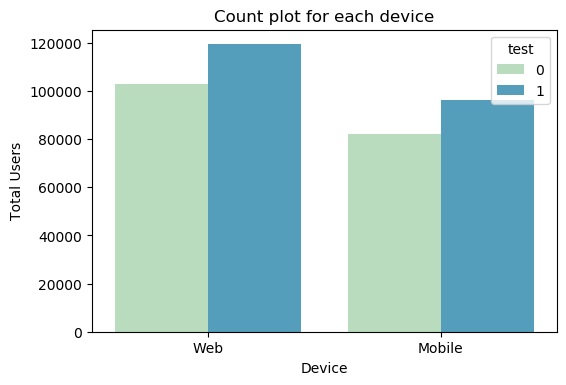

In [107]:
plt.figure(dpi = (100))
_ = sns.countplot(x = 'device', hue = 'test', data = data, palette='GnBu')
_ = plt.xlabel("Device")
_ = plt.ylabel("Total Users")
_ = plt.title("Count plot for each device")

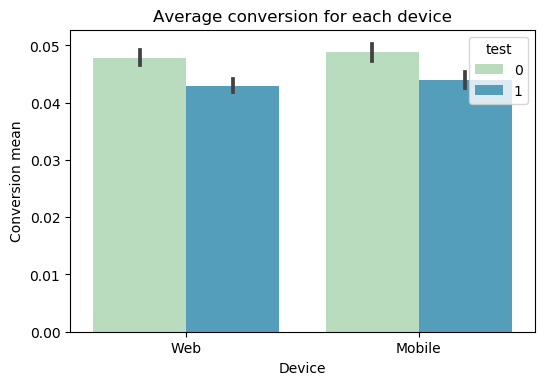

In [109]:
plt.figure(dpi = (100))
_ = sns.barplot(x = 'device', y = 'conversion', data = data, palette='GnBu', hue = 'test')
_ = plt.xlabel("Device")
_ = plt.ylabel("Conversion mean")
_ = plt.title("Average conversion for each device")

## For Sex

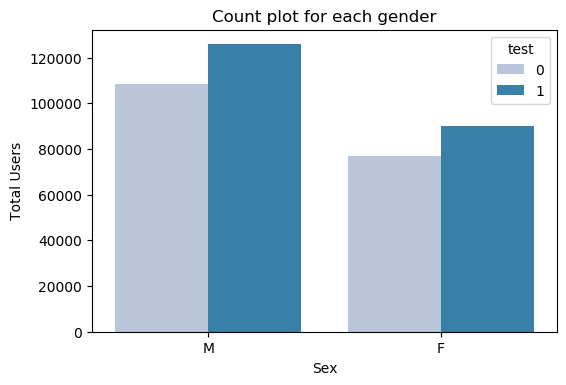

In [111]:
plt.figure(dpi = (100))
_ = sns.countplot(x = 'sex', hue = 'test', data = data, palette='PuBu')
_ = plt.xlabel("Sex")
_ = plt.ylabel("Total Users")
_ = plt.title("Count plot for each gender")

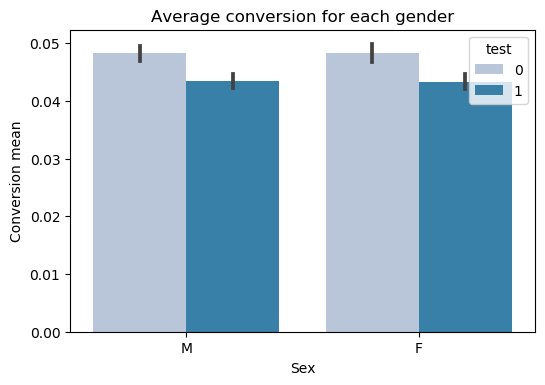

In [112]:
plt.figure(dpi = (100))
_ = sns.barplot(x = 'sex', y = 'conversion', data = data, palette='PuBu', hue = 'test')
_ = plt.xlabel("Sex")
_ = plt.ylabel("Conversion mean")
_ = plt.title("Average conversion for each gender")

## For age

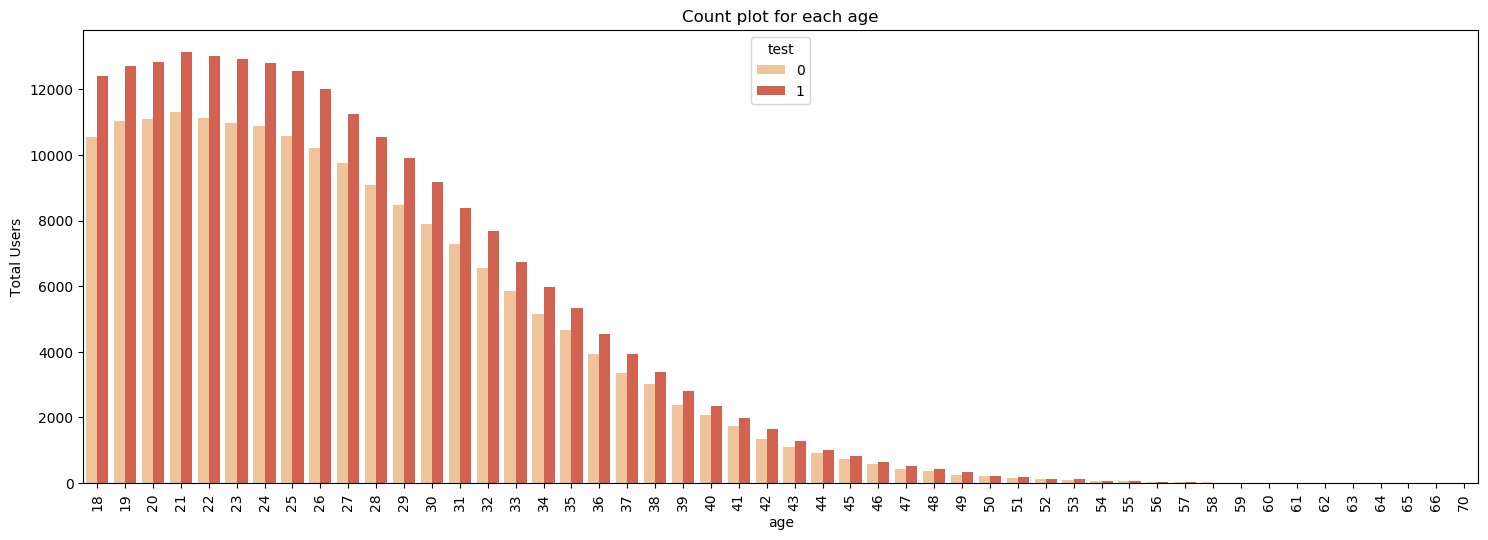

In [123]:
plt.figure(dpi = (100), figsize = (18,6))
_ = sns.countplot(x = 'age', hue = 'test', data = data, palette='OrRd')
_ = _.set_xticklabels(_.get_xticklabels(), rotation = 90)
_ = plt.xlabel("age")
_ = plt.ylabel("Total Users")
_ = plt.title("Count plot for each age")

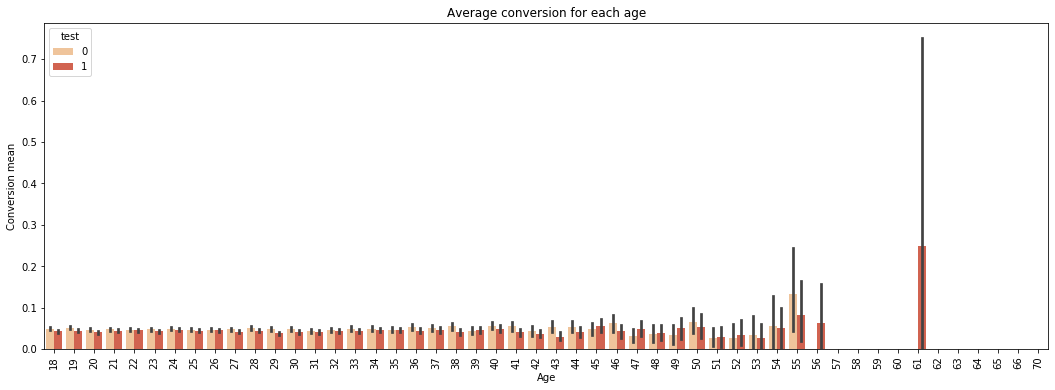

In [122]:
plt.figure(figsize = (18,6))
_ = sns.barplot(x = 'age', y = 'conversion', data = data, palette='OrRd', hue = 'test')
_ = _.set_xticklabels(_.get_xticklabels(), rotation = 90)
_ = plt.xlabel("Age")
_ = plt.ylabel("Conversion mean")
_ = plt.title("Average conversion for each age")

In [151]:
data[data['age'] == 61]

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
65282,194408,2015-12-02,Ads,Mobile,ES,Google,Iphone_App,0,0,M,61,Mexico
73201,145181,2015-11-30,Ads,Mobile,EN,Yahoo,Iphone_App,0,1,F,61,Argentina
91592,559580,2015-12-04,SEO,Web,EN,NaN,IE,0,1,M,61,Ecuador
276375,859504,2015-12-01,Ads,Web,ES,Google,Chrome,0,0,M,61,Chile
325023,959676,2015-11-30,SEO,Web,ES,NaN,Safari,0,0,M,61,Mexico
419907,183731,2015-11-30,Ads,Web,ES,Bing,Chrome,0,1,M,61,Mexico
422702,241574,2015-12-04,SEO,Web,ES,NaN,Chrome,1,1,M,61,Argentina


## For browser_language

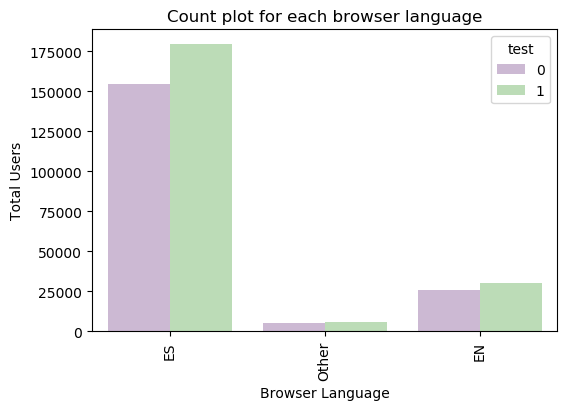

In [158]:
plt.figure(dpi = 100)
_ = sns.countplot(x = 'browser_language', hue = 'test', data = data, palette='PRGn')
_ = _.set_xticklabels(_.get_xticklabels(), rotation = 90)
_ = plt.xlabel("Browser Language")
_ = plt.ylabel("Total Users")
_ = plt.title("Count plot for each browser language")

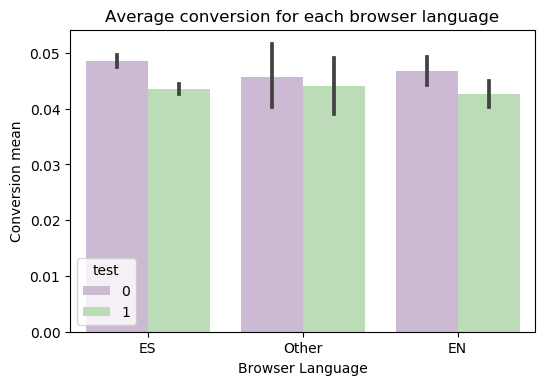

In [159]:
plt.figure(dpi = (100))
_ = sns.barplot(x = 'browser_language', y = 'conversion', data = data, palette='PRGn', hue = 'test')
_ = plt.xlabel("Browser Language")
_ = plt.ylabel("Conversion mean")
_ = plt.title("Average conversion for each browser language")

# Testing

Next, we are going to formulate the hypothesis. In null hypothesis, we are going state as the new's conversion rate is great or equal to old's. The alternative is the new's conversion rate is lower than new's. And we set $\alpha$ = 0.5

<center> $H_0$ : $Test_{conversion}$ - $Control_{conversion}$ $\ge$ 0 
<center> $H_0$ : $Test_{conversion}$ - $Control_{conversion}$ $\lt$ 0 

This means, the new version is doing almost equally or greate than the old one. Or they new version is not as good as the old version.

In [65]:
test = data[data['test'] == 1]['conversion'].values
control = data[data['test'] == 0]['conversion'].values

In [66]:
from scipy.stats import ttest_ind

In [131]:
ttest_ind(test, control, equal_var=True)

Ttest_indResult(statistic=-7.382252163053968, pvalue=1.559329277881674e-13)

In [130]:
sd.

1.559329277881674e-13

The p-value here is significantly smaller than $\alpha$. Therefore, we need to reject the null hypothesis and conclude that the new version is worse than old version. Then, the translation has little effect on the conversion.

In [128]:
country = data.country.unique()

In [140]:
country

array(['Mexico', 'Venezuela', 'Bolivia', 'Colombia', 'Uruguay',
       'El Salvador', 'Nicaragua', 'Peru', 'Costa Rica', 'Chile',
       'Argentina', 'Ecuador', 'Guatemala', 'Honduras', 'Paraguay',
       'Panama'], dtype=object)

In [143]:
pvalues = []
test2_mean = []
control2_mean = []

for i in country:
    test2 = data[(data['test'] == 1) & (data['country'] == i)]['conversion'].values
    control2 = data[(data['test'] == 0)& (data['country'] == i)]['conversion'].values
    pval1 = ttest_ind(test2, control2, equal_var=True).pvalue
    test_mean = test2.mean()
    control_mean = control2.mean()
    pvalues.append(pval1)
    test2_mean.append(test_mean)
    control2_mean.append(control_mean)

In [148]:
d1 = pd.DataFrame([country, test2_mean, control2_mean, pvalues]).transpose()

In [149]:
d1.columns = ['Country','Test_mean','Control_Mean',"P-value"]

In [150]:
d1

,Country,Test_mean,Control_Mean,P-value
0,Mexico,0.0511863,0.0494946,0.165547
1,Venezuela,0.0489783,0.0503437,0.57374
2,Bolivia,0.047901,0.0493694,0.718877
3,Colombia,0.050571,0.0520895,0.423733
4,Uruguay,0.0129067,0.0120482,0.882812
5,El Salvador,0.0479469,0.053554,0.248251
6,Nicaragua,0.0541768,0.052647,0.780351
7,Peru,0.0506043,0.049914,0.77195
8,Costa Rica,0.0547376,0.0522556,0.687863
9,Chile,0.051295,0.0481072,0.302871


# Conclusion
* This test shows that the original verision does better than the new one, so we'd better stick to the Spaniard.
* This experiment might be invaidated due to bias in sampling users from different countries.
* Besides, from my perspective, the variable 'browser_language' should not be included in this test. Since we are only focusing on two type's translation effect, including this might bring more variance to this experiment.